In [1]:
pip install numpy matplotlib scipy


Note: you may need to restart the kernel to use updated packages.


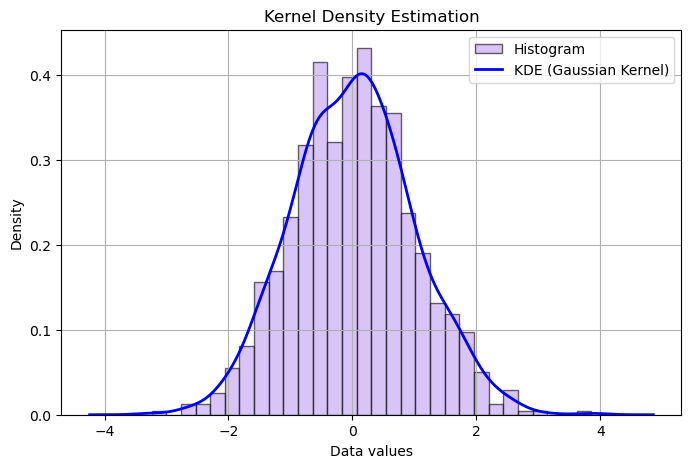

In [1]:
'''1. Develop a code to demonstrate Kernel Density Estimation'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate sample data
np.random.seed(42)  # For reproducibility
data = np.random.normal(0, 1, size=1000)  # 1000 samples from a normal distribution

# Perform Kernel Density Estimation
kde = gaussian_kde(data, bw_method='scott')  # Scott's bandwidth estimator
x = np.linspace(min(data) - 1, max(data) + 1, 1000)  # X values for the plot
density = kde(x)  # Estimated density

# Plot the results
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='#be9df2', edgecolor='black', label='Histogram')
plt.plot(x, density, color='blue', lw=2, label='KDE (Gaussian Kernel)')
plt.title('Kernel Density Estimation')
plt.xlabel('Data values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
pip install seaborn matplotlib pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


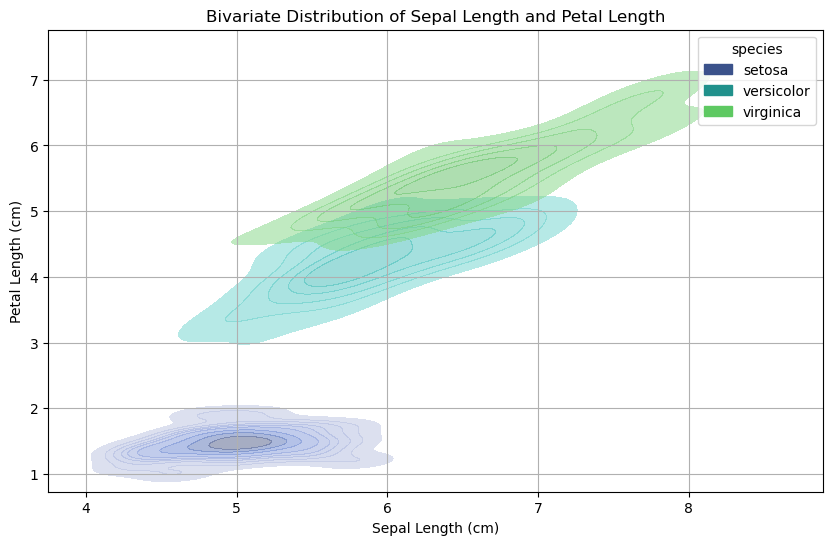

In [1]:
'''2.Develop a code to plot bivariate distribution considering a suitable'''
data set available on the open source
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Step 1: Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target species to the dataset
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].apply(lambda x: iris.target_names[x])

# Step 2: Choose two features for bivariate analysis
feature_x = iris.feature_names[0]  # 'sepal length (cm)'
feature_y = iris.feature_names[2]  # 'petal length (cm)'

# Step 3: Plot the bivariate distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=iris_df,
    x=feature_x,
    y=feature_y,
    hue='species',
    fill=True,
    palette='viridis',
    alpha=0.5
)
plt.title('Bivariate Distribution of Sepal Length and Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()


In [7]:
pip install bokeh geopandas pandas



  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/26/0c/b084e8839a117eaad8cb4fbaa81bbb24c6f183de0ee95c6c4e2770ab6f09/pyproj-3.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/b1/5a/6a67d929c467a1973b6bb9f0b00159cc343b02bf9a8d26db1abd2f87aa23/shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ---------------------------------------- 323.6/323.6 kB 6.7 MB/s eta 0:00:00
 

In [10]:
pip install geodatasets


  Obtaining dependency information for geodatasets from https://files.pythonhosted.org/packages/9d/dd/e30e144271280d263c0c10f34fbcf2e09e9a82bd11a165c5f1f498899a29/geodatasets-2024.8.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [5]:
'''3. Develop a code to showcase various Geospatial data also make use of Bokeh to make it more interactive'''
import math
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.tile_providers import get_provider, CARTODBPOSITRON
output_notebook()

# Sample data: City names with latitude and longitude
data = {
    'name': ['New York', 'London', 'Tokyo', 'Sydney'],
    'latitude': [40.7128, 51.5074, 35.6895, -33.8688],
    'longitude': [-74.0060, -0.1278, 139.6917, 151.2093]
}

# Function to convert latitude and longitude to Web Mercator (simplified)
def lat_lon_to_mercator(lat, lon):
    x = lon * 20037508.34 / 180  # Longitude to Web Mercator X
    y = math.log(math.tan((90 + lat) * math.pi / 360)) * 20037508.34 / math.pi  # Latitude to Web Mercator Y
    return x, y

# Convert lat/lon to Web Mercator coordinates
data['x'], data['y'] = zip(*[lat_lon_to_mercator(lat, lon) for lat, lon in zip(data['latitude'], data['longitude'])])

# Create a Bokeh data source
source = ColumnDataSource(data)

# Set up the Bokeh plot
p = figure(title="Simple Interactive Map",
           x_axis_type="mercator", y_axis_type="mercator",
           width=800, height=500)

# Add a basemap (tile provider)
tile_provider = get_provider(CARTODBPOSITRON)
p.add_tile(tile_provider)

# Add city markers
p.circle(x='x', y='y', size=10, color="blue", alpha=0.7, source=source)

# Add interactivity (hover tool)
hover = HoverTool()
hover.tooltips = [("City", "@name"), ("Latitude", "@latitude"), ("Longitude", "@longitude")]
p.add_tools(hover)

# Show the plot
show(p)


Loading BokehJS ...

In [6]:
'''4. Develop a code to plot network and interconnection using geospatial data'''
import math
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Range1d
from bokeh.tile_providers import get_provider, CARTODBPOSITRON

# Display the plot in the notebook
output_notebook()

# Sample data: City names with latitude, longitude, and interconnections
cities = {
    'name': ['New York', 'London', 'Tokyo', 'Sydney'],
    'latitude': [40.7128, 51.5074, 35.6895, -33.8688],
    'longitude': [-74.0060, -0.1278, 139.6917, 151.2093]
}

# Function to convert latitude and longitude to Web Mercator (simplified)
def lat_lon_to_mercator(lat, lon):
    x = lon * 20037508.34 / 180  # Longitude to Web Mercator X
    y = math.log(math.tan((90 + lat) * math.pi / 360)) * 20037508.34 / math.pi  # Latitude to Web Mercator Y
    return x, y

# Convert lat/lon to Web Mercator coordinates for each city
cities['x'], cities['y'] = zip(*[lat_lon_to_mercator(lat, lon) for lat, lon in zip(cities['latitude'], cities['longitude'])])

# Define interconnections (edges) between cities as pairs of city indices
connections = [
    (0, 1),  # New York <-> London
    (1, 2),  # London <-> Tokyo
    (2, 3),  # Tokyo <-> Sydney
    (0, 3),  # New York <-> Sydney
]

# Prepare lists to store line coordinates (x, y)
lines_x = []
lines_y = []

for start, end in connections:
    # Get the coordinates of the starting and ending city
    x0, y0 = cities['x'][start], cities['y'][start]
    x1, y1 = cities['x'][end], cities['y'][end]
    
    # Append the coordinates to form the lines
    lines_x.extend([x0, x1, None])  # None is used to separate line segments
    lines_y.extend([y0, y1, None])

# Create a Bokeh ColumnDataSource for the cities and connections
source = ColumnDataSource(data=dict(
    x=cities['x'],
    y=cities['y'],
    name=cities['name']
))

# Set up the Bokeh plot
p = figure(title="Simple Geospatial Network of Cities",
           x_axis_type="mercator", y_axis_type="mercator",
           width=800, height=500)

# Add a basemap (tile provider)
tile_provider = get_provider(CARTODBPOSITRON)
p.add_tile(tile_provider)

# Add city markers (points)
p.circle(x='x', y='y', size=10, color="blue", alpha=0.7, source=source)

# Add lines to represent connections between cities
p.line(x=lines_x, y=lines_y, line_width=2, color="green", alpha=0.6)

# Add interactivity with HoverTool for cities
hover = HoverTool()
hover.tooltips = [("City", "@name"), ("Latitude", "@latitude"), ("Longitude", "@longitude")]
p.add_tools(hover)

# Set axis range to fit all points and lines
p.x_range = Range1d(min(cities['x']) - 5000000, max(cities['x']) + 5000000)
p.y_range = Range1d(min(cities['y']) - 5000000, max(cities['y']) + 5000000)

# Show the plot in the notebook
show(p)


Loading BokehJS ...